In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/umaac/Downloads/iris data.csv")
df

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
dict_species={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2,}
df.replace({'Species':dict_species},inplace=True)
df

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
df=df.drop(['id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
x=df.drop(['Species'],axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

# Random Forest

In [11]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['squared_error'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [12]:
RFC_reg.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 125}

In [13]:
reg=RandomForestRegressor(n_estimators=125,criterion='squared_error',max_depth=5)
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=125)

In [14]:
y_pred=reg.predict(x_test)
y_pred

array([0.888, 1.496, 2.   , 1.   , 2.   , 0.96 , 2.   , 0.96 , 0.   ,
       2.   , 0.984, 0.   , 0.   , 0.   , 0.888, 1.912, 0.   , 0.   ,
       0.   , 0.96 , 0.   , 0.96 , 2.   , 0.   , 1.   , 1.936, 0.   ,
       1.576, 1.984, 1.   , 0.888, 2.   , 0.888, 0.   , 0.888, 2.   ,
       0.   , 0.   , 0.888, 1.92 , 0.   , 1.984, 0.   , 0.   , 1.576,
       0.856, 2.   , 1.496, 1.496, 2.   , 0.888, 0.   , 0.   , 1.496,
       2.   , 0.   , 0.   , 0.   , 1.408, 2.   , 0.   , 2.   , 2.   ,
       0.   , 1.   , 1.   , 1.576, 1.   , 2.   , 0.   , 2.   , 1.   ,
       2.   , 0.96 , 0.888, 1.   , 0.   , 1.   , 0.888, 0.   , 0.96 ,
       2.   , 2.   , 0.   , 0.888, 2.   , 1.496, 0.   , 2.   , 0.   ,
       1.408, 2.   , 2.   , 0.96 , 2.   , 1.   , 1.   , 1.848, 2.   ,
       0.   , 1.   , 1.296, 0.096, 0.984, 2.   ])

In [15]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9433775675675676

In [16]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,81,1,0.888,0
1,133,2,1.496,1
2,137,2,2.000,2
3,75,1,1.000,3
4,109,2,2.000,4
5,96,1,0.960,5
6,105,2,2.000,6
7,66,1,0.960,7
8,0,0,0.000,8
9,122,2,2.000,9


[]

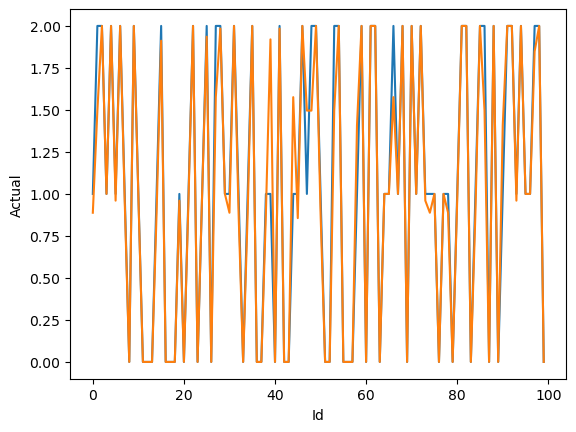

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

# Elastic regression

In [18]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [19]:
elastic_regressor.best_params_

{'alpha': 0.001}

In [20]:
elastic=ElasticNet(alpha=.01)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.9137176658838962

In [22]:
from sklearn.metrics import mean_squared_error
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

0.05559634481277106

In [23]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,81,1,0.851374,0
1,133,2,1.370282,1
2,137,2,1.640876,2
3,75,1,1.161582,3
4,109,2,2.172819,4
5,96,1,1.130135,5
6,105,2,1.936544,6
7,66,1,1.329303,7
8,0,0,-0.059211,8
9,122,2,1.873427,9


[]

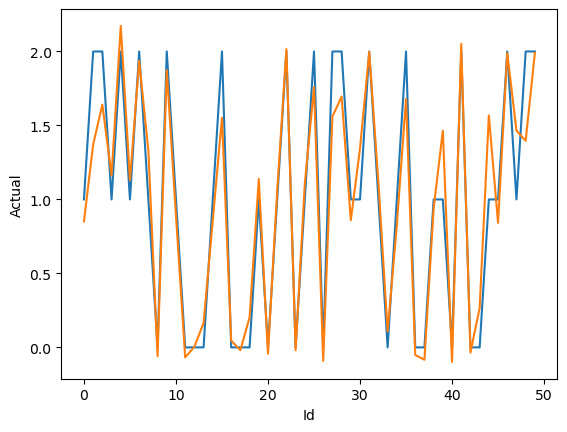

In [24]:
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# linear regresiion

In [25]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
ypred=reg.predict(x_test)

In [27]:
ypred

array([ 0.83560832,  1.33469958,  1.63830348,  1.12040136,  2.21898819,
        1.13976119,  1.85676116,  1.36928717, -0.07216822,  1.76235676,
        0.84441729, -0.08865552,  0.01894479,  0.17000589,  0.87903523,
        1.57396727,  0.03120677, -0.04135674,  0.22594965,  1.1513114 ,
       -0.06171474,  1.05303631,  1.95555486, -0.00289727,  1.07765233,
        1.84856584, -0.12001477,  1.61133   ,  1.76074422,  0.79440643,
        1.39897038,  2.10267749,  1.13537188,  0.10292842,  0.85977396,
        1.69589293, -0.060618  , -0.08646204,  0.93607808,  1.44326652,
       -0.12533919,  2.2042428 , -0.04687313,  0.32035405,  1.62946299,
        0.90029681,  2.03179238,  1.46594928,  1.33321669,  1.95816484,
        1.13866327,  0.02184885, -0.08633194,  1.35725105,  1.5817122 ,
        0.00755621,  0.01620236,  0.01139538,  1.30556414,  2.20040481,
        0.0887647 ,  1.8424031 ,  2.33552639, -0.02983805,  1.22926121,
        1.2445205 ,  1.57835539,  1.10062384,  2.05760372, -0.04

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9061090481372914

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred,y_test)

0.060498986125413295

In [30]:
Results=pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,Actual,Predicted,ID
0,81,1,0.835608,0
1,133,2,1.334700,1
2,137,2,1.638303,2
3,75,1,1.120401,3
4,109,2,2.218988,4
5,96,1,1.139761,5
6,105,2,1.856761,6
7,66,1,1.369287,7
8,0,0,-0.072168,8
9,122,2,1.762357,9


[]

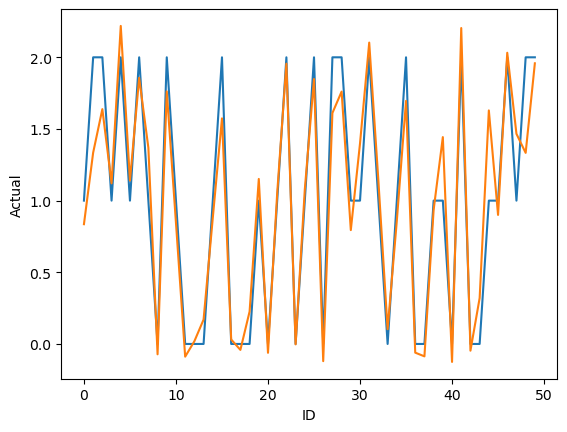

In [31]:
sns.lineplot(x='ID',y='Actual',data=Results.head(50))
sns.lineplot(x='ID',y='Predicted',data=Results.head(50))
plt.plot()

In [32]:
new=[[4.6,3.1,1.5,0.2]]

In [33]:
real=reg.predict(new)
real

array([0.00755621])

In [34]:
cor_mat=df.corr()
cor_mat

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

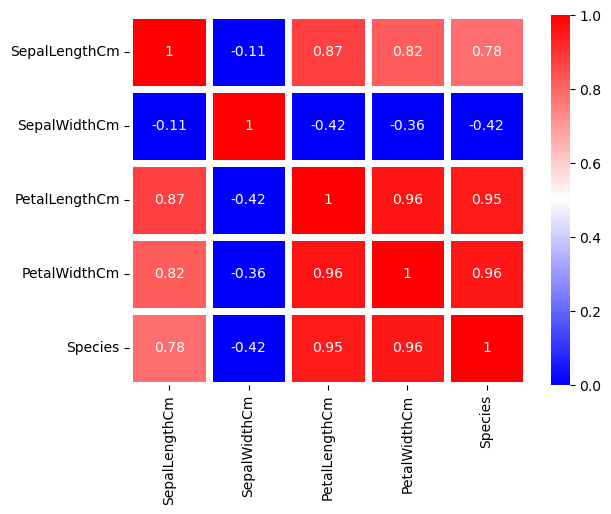

In [35]:
sns.heatmap(cor_mat,vmax=1,vmin=0,annot=True,linewidths=5,cmap='bwr')